In [4]:
import numpy as np
import pandas as pd
from scipy import stats
data = pd.read_csv('C:\\Users\\USER\\Downloads\\Ames_Housing_Sales.csv')
data.shape
data.dtypes.value_counts()
#    from sklearn.model_selection import test_train_split
#    import pandas as pd

data = pd.read_csv('C:\\Users\\USER\\Downloads\\Ames_Housing_Sales.csv')
#    train_x, test_x, train_y, test_y = test_train_split(data, test_size = 0.2)

In [5]:
from sklearn.model_selection import ShuffleSplit
pd.set_option('display.max_columns', None)
df = data.copy()

In [33]:
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Timber', 'Gilbert', 'StoneBr',
       'ClearCr', 'Edwards', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
data[data['Neighborhood'] == 'CollgCr']

In [6]:
#seperating the objects in the data
mask = data.dtypes == np.object
cat_col = data.columns[mask]

In [7]:
pro_data = data[cat_col]

In [ ]:
#    pro_data.apply(lambda x: x.nunique())
#    num_ohc_cols = (pro_data.apply(lambda x: x.nunique()).sort_values(ascending = False))
#    small = num_ohc_cols.loc[num_ohc_cols > 1]

#    small -= 1
#    small.sum()

In [8]:
mask = data.dtypes != np.object
num = data.columns[mask]
num = list(num)
#num.pop()

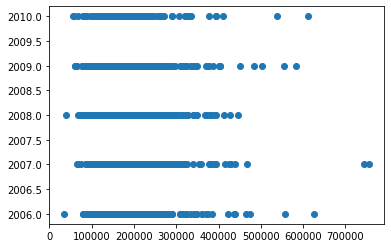

In [10]:
import matplotlib.pyplot as plt
x = data['SalePrice']
y = data['YrSold']
plt.scatter(x, y)
plt.show()

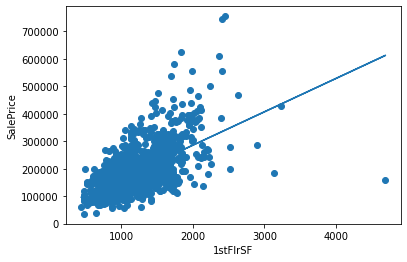

0.5949352701531119
4.422801301541523


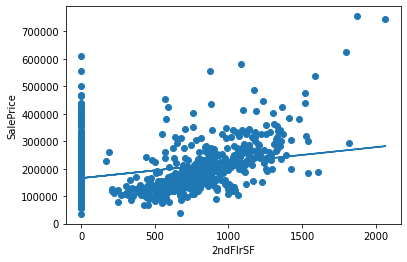

0.3133355898234006
4.600871940685083


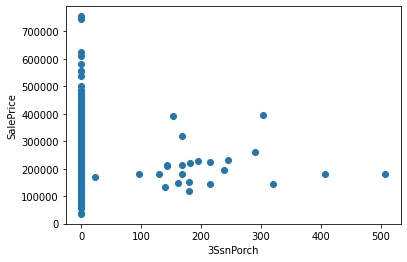

0.039226346612596615
70.56710429779996


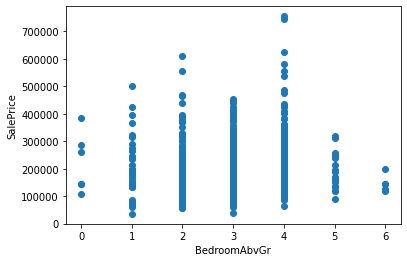

0.16465494921067636
2679.343701823453


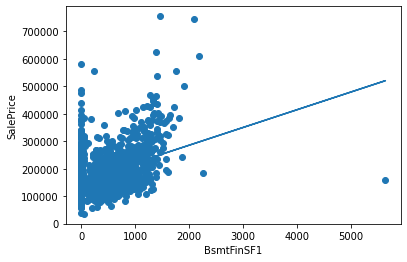

0.3755627556460631
4.293482346893974


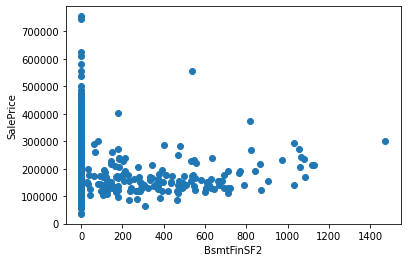

-0.023242905914850127
12.956011966207802


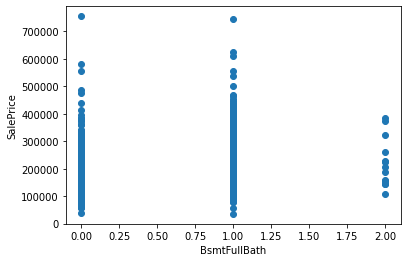

0.22598801206023691
4035.5338618423675


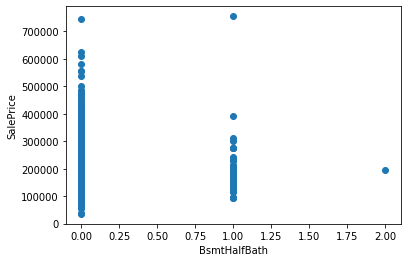

-0.02565087567084924
8934.136514406446


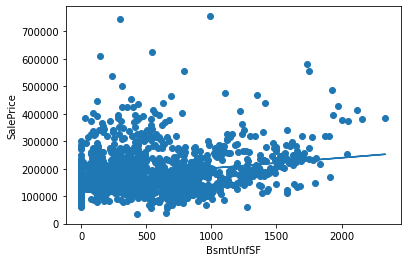

0.21313492312249646
4.689519890587917


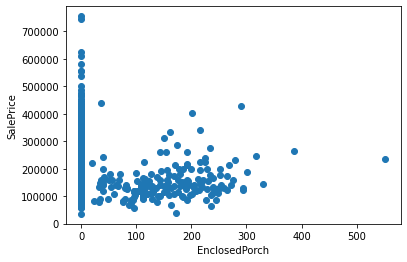

-0.12016443034823461
34.92414390827706


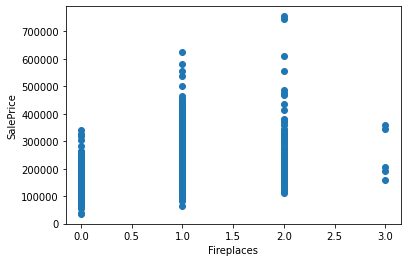

0.44887748284169265
2945.8400495472283


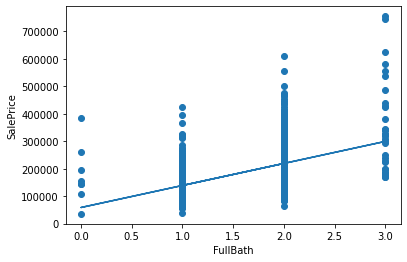

0.5565503021306585
3228.3039351166212


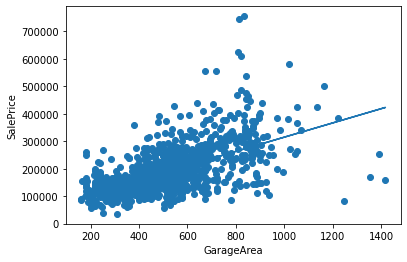

0.6084052829168349
9.102092648436553


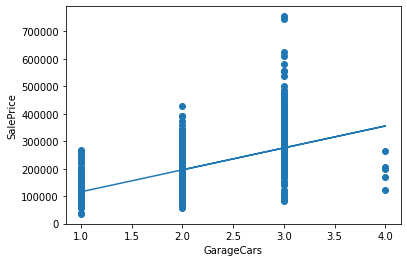

0.6370954062078928
2605.2302438507386


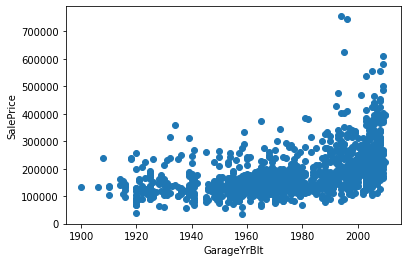

0.4863616774878608
75.36438301336716


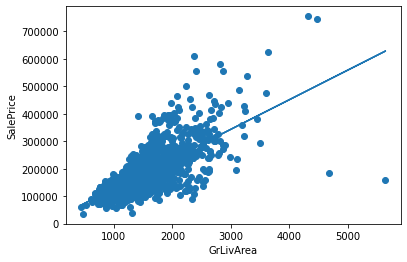

0.7081721139540178
2.896247842312886


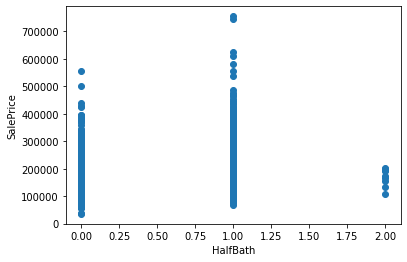

0.27072120770545055
4080.490897475343


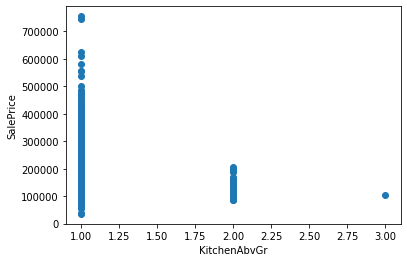

-0.13557396150699433
10762.20653834096


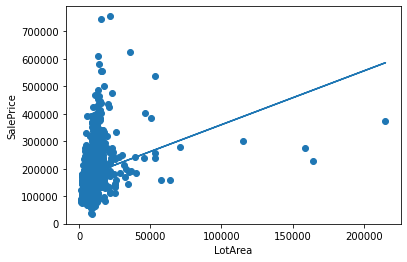

0.2529214590904538
0.20170226975505065


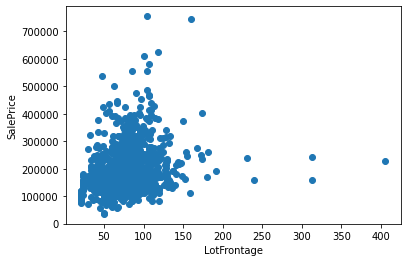

0.28197622173891246
72.4157056536389


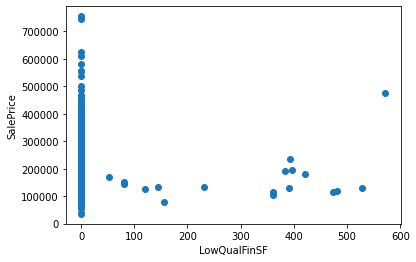

-0.00836439519630623
53.064145168542375


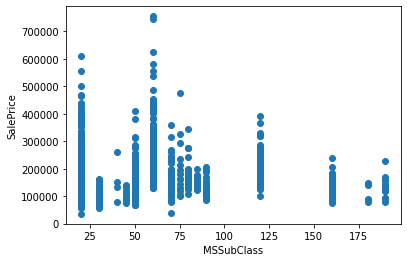

-0.07770711500064287
51.749667725314346


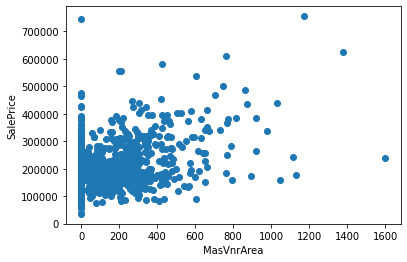

0.46313912358889786
10.246764867798968


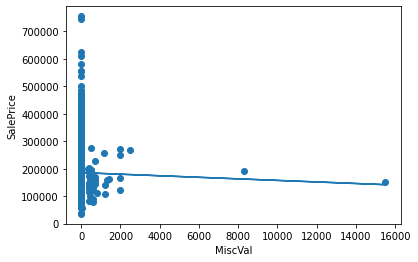

-0.01793338582459383
4.2447488671328255


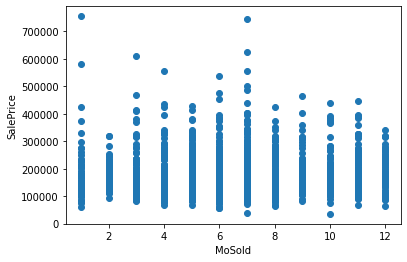

0.04374889724948186
788.945385109684


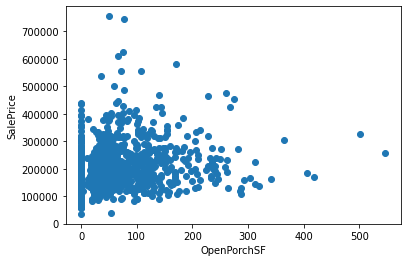

0.3330361948900671
30.792591774901716


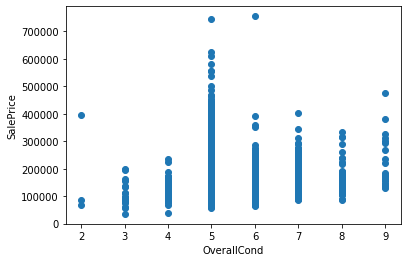

-0.09527774132244107
1960.9792653119523


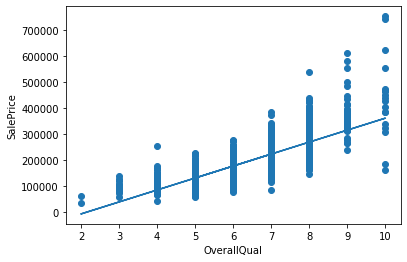

0.787227826087335
975.8085068280899


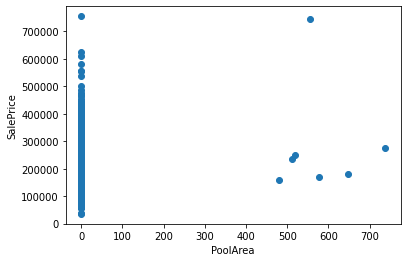

0.09151838619033476
51.302835491812026


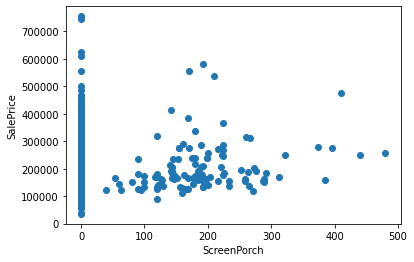

0.09945281380942717
37.0135352581949


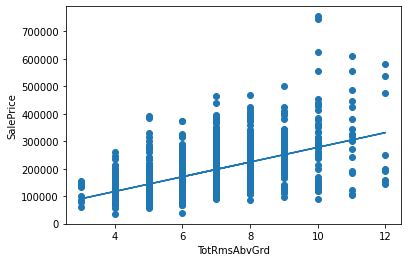

0.5383091241374476
1128.861355083334


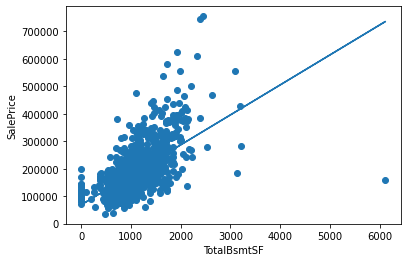

0.6035834052193845
3.8909565074155172


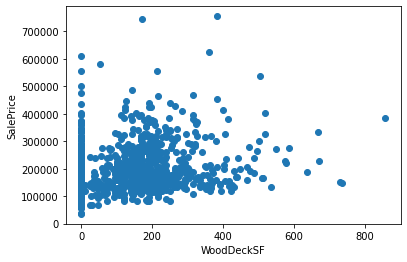

0.31263142658039583
15.965547939028774


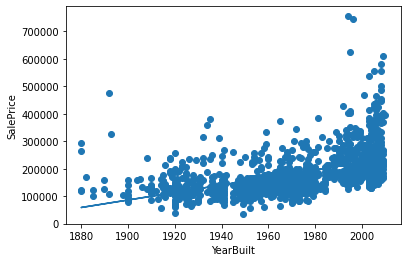

0.5075840635608163
62.45226470284988


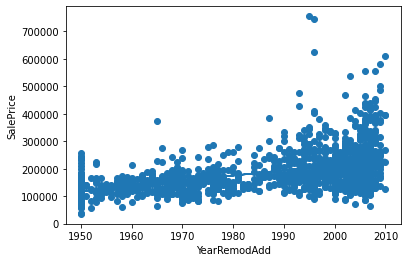

0.505434060859455
89.87738666698625


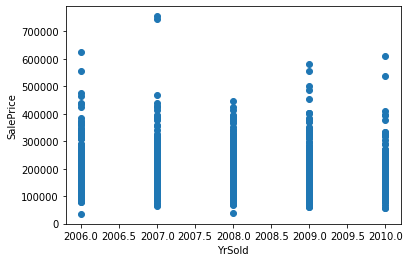

-0.02672551320026701
1600.340499420224


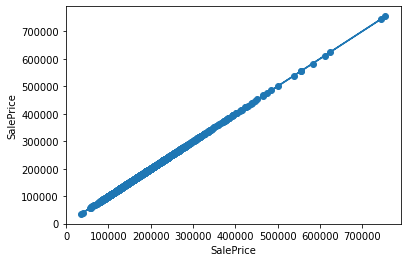

1.0
0.0


In [11]:
lip = []
from scipy import stats
x = 0
while x < len(num):
    X = data[num[x]]
    y = data['SalePrice']
    
    slope, intercept, r, p, std_err = stats.linregress(X,y)
    def mine(x):
        return slope * x + intercept
    mymodel = list(map(mine, X))
    plt.xlabel(num[x])
    plt.ylabel('SalePrice')
    plt.scatter(X, y)
    if r >= 0.5 or std_err < 10:
        lip.append(num[x])
        plt.plot(X, mymodel)
    plt.show()
    print(r)
    print(std_err)
    x += 1

In [12]:
x= data[lip].sample(n = 300)
y = data[lip].drop(x.index)

In [13]:
lip.pop()

'SalePrice'

In [14]:
X = x[lip]
Y = y[lip]

In [23]:
from sklearn import linear_model
train_x = Y
train_y = y['SalePrice']

test_x = X
test_y = x['SalePrice']

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [30]:
x

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,FullBath,GarageArea,GarageCars,GrLivArea,LotArea,MiscVal,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
652,1067.0,472.0,0.0,927.0,1,576.0,2,1539.0,6120.0,0.0,5,5,927.0,1936,1950,141500.0
901,768.0,0.0,660.0,108.0,1,396.0,1,768.0,7200.0,0.0,5,5,768.0,1972,2003,133900.0
479,689.0,689.0,141.0,548.0,2,360.0,2,1378.0,9600.0,0.0,7,7,689.0,1928,2005,161000.0
704,1088.0,441.0,0.0,0.0,2,240.0,1,1529.0,8405.0,0.0,4,9,0.0,1945,1950,98000.0
997,979.0,871.0,595.0,378.0,2,467.0,2,1850.0,29959.0,0.0,7,7,973.0,1994,1994,248000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1077.0,0.0,0.0,1007.0,1,210.0,1,1077.0,9786.0,0.0,3,6,1007.0,1922,1950,91000.0
1092,1314.0,0.0,904.0,410.0,2,626.0,2,1314.0,5001.0,0.0,7,6,1314.0,2007,2008,230000.0
1049,773.0,885.0,219.0,554.0,2,431.0,2,1658.0,8000.0,0.0,6,8,773.0,1995,1996,188000.0
219,483.0,504.0,358.0,125.0,1,264.0,1,987.0,1680.0,0.0,6,5,483.0,1971,1971,89500.0


In [29]:
c = test_x.loc[219]

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([c])

print(predictedCO2, x['SalePrice'].loc[219])

[120520.87161574] 89500.0
